# Product Categorization EDA

## Data Analysis of cosmetic products data.

The project concerns exploratory data analysis of cosmetic products. The dataset contains the details about makeup products such as description, brand, category, name, etc. 

### Dataset

The dataset contains the details about makeup products such as brand, category, description, name, etc. It comes from http://makeup-api.herokuapp.com/.

Attributes:

* Brand (text: name of the brand)
* Category (text: category of products)
* Currency (text)
* Description (text: product description)
* Id (numeric)
* Name (numeric: name of the product)
* Price (numeric: product price)
* Price sign (text)
* Product type (text)
* Rating (numeric)
* Tag list (text)


## Import libriaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data\products_final.csv', header=0,index_col=0)
df.head()

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


First observations:

In [123]:
print('Shape of data:\n')
print(df.shape)

Shape of data:

(931, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         919 non-null    object 
 1   category      507 non-null    object 
 2   currency      368 non-null    object 
 3   description   906 non-null    object 
 4   id            931 non-null    int64  
 5   name          931 non-null    object 
 6   price         917 non-null    float64
 7   price_sign    368 non-null    object 
 8   product_type  931 non-null    object 
 9   rating        340 non-null    float64
 10  tag_list      931 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 87.3+ KB


Type of data:

In [5]:
df.dtypes

brand            object
category         object
currency         object
description      object
id                int64
name             object
price           float64
price_sign       object
product_type     object
rating          float64
tag_list         object
dtype: object

Columns:

In [6]:
df.columns

Index(['brand', 'category', 'currency', 'description', 'id', 'name', 'price',
       'price_sign', 'product_type', 'rating', 'tag_list'],
      dtype='object')

Deleting duplicate rows:

In [3]:
df.drop_duplicates(inplace=True)

Checking unique values in each column:

In [8]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in brand: 57
Number of unique values in category: 14
Number of unique values in currency: 3
Number of unique values in description: 865
Number of unique values in id: 931
Number of unique values in name: 928
Number of unique values in price: 157
Number of unique values in price_sign: 2
Number of unique values in product_type: 10
Number of unique values in rating: 26
Number of unique values in tag_list: 34


Checking the missing values in data:

In [9]:
df.isnull().sum()  

brand            12
category        424
currency        563
description      25
id                0
name              0
price            14
price_sign      563
product_type      0
rating          591
tag_list          0
dtype: int64

Examples with missing data:

In [10]:
df[df.isnull().any(axis=1)].head(3)

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"


The dataset includes information about 931 products placed in 11 columns. After first observations one can see that there are missing values. The columns names are explicit, so it can easily infer that what one can see in this dataset.

Checking only numerical data:

In [11]:
df_two = df._get_numeric_data()
df_two.head()

,id,price,rating
0,1048,5.0,NaN
1,1047,5.5,NaN
2,1046,5.5,NaN
3,1045,12.0,NaN
4,1044,26.0,NaN


Exchange of columns:

In [12]:
df_two = df_two[['rating', 'price', 'id']]
df_two.head()

,rating,price,id
0,NaN,5.0,1048
1,NaN,5.5,1047
2,NaN,5.5,1046
3,NaN,12.0,1045
4,NaN,26.0,1044


## Exploratory Data Analysis

List of unique names in each column:

In [13]:
df['category'].unique()

array(['pencil', 'lipstick', 'liquid', nan, 'powder', 'lip_gloss', 'gel',
       'cream', 'palette', 'concealer', 'highlighter', 'bb_cc', 'contour',
       'lip_stain', 'mineral'], dtype=object)

In [14]:
df['rating'].unique()

array([nan, 5. , 4. , 4.7, 4.5, 2.5, 4.6, 4.4, 3. , 3.8, 4.8, 3.3, 4.9,
       4.3, 2. , 2.3, 4.2, 3.5, 3.7, 3.9, 4.1, 2.6, 3.6, 3.4, 1.5, 3.2,
       3.1])

In [15]:
df['brand'].unique()

array(['colourpop', 'boosh', 'deciem', 'zorah biocosmetiques',
       'w3llpeople', "sally b's skin yummies", 'rejuva minerals',
       'penny lane organics', 'nudus', 'marienatie',
       "maia's mineral galaxy", 'lotus cosmetics usa', 'green people',
       'coastal classic creation', "c'est moi", 'alva', 'glossier', 'nyx',
       'fenty', 'clinique', 'dior', 'iman', 'benefit', 'smashbox',
       'marcelle', 'stila', 'mineral fusion', nan, 'annabelle',
       'dr. hauschka', 'physicians formula', 'cargo cosmetics',
       'covergirl', 'e.l.f.', 'maybelline', 'almay', 'milani',
       'pure anada', "l'oreal", 'sante', 'revlon', 'anna sui',
       'wet n wild', 'pacifica', 'mistura', 'zorah', 'suncoat', 'moov',
       'misa', 'salon perfect', 'orly', 'china glaze', 'essie',
       'butter london', 'sinful colours', 'piggy paint', 'dalish',
       "burt's bees"], dtype=object)

In [16]:
df['product_type'].unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

In [17]:
df['tag_list'].unique()

array(["['Vegan', 'cruelty free']", "['Organic', 'Chemical Free']",
       "['Gluten Free', 'Vegan', 'silicone free', 'oil free', 'alcohol free', 'cruelty free', 'water free']",
       "['EcoCert', 'purpicks']",
       "['Gluten Free', 'EWG Verified', 'purpicks']",
       "['EWG Verified', 'purpicks']",
       "['No Talc', 'Hypoallergenic', 'EWG Verified', 'purpicks']",
       "['Organic', 'Vegan', 'EWG Verified', 'purpicks']",
       "['Gluten Free', 'Vegan', 'EWG Verified', 'purpicks']",
       "['Gluten Free', 'Chemical Free', 'Vegan', 'CertClean', 'purpicks']",
       "['purpicks']", "['CertClean', 'purpicks']",
       "['Gluten Free', 'Vegan', 'CertClean', 'purpicks']",
       "['Organic', 'USDA Organic', 'purpicks']",
       "['Organic', 'Vegan', 'purpicks']", '[]', "['Canadian']",
       "['Canadian', 'Gluten Free', 'Vegan', 'Natural']",
       "['Gluten Free', 'Natural']", "['Gluten Free']",
       "['Canadian', 'Natural']", "['Vegan']", "['Natural']",
       "['Organic', 'Natu

### The analysis of individual variables:

**Category distribution:**

In [18]:
df['category'].value_counts()

category
lipstick       122
liquid         117
powder          68
pencil          62
cream           34
palette         27
lip_gloss       26
concealer       19
mineral         11
bb_cc            9
lip_stain        4
gel              3
contour          3
highlighter      2
Name: count, dtype: int64

In [19]:
cat = df['category'].value_counts()

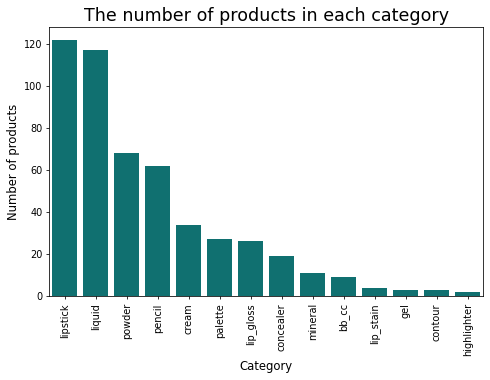

In [82]:
plt.figure(figsize=(8,5), dpi=70)
sns.barplot(x=cat.index,y=cat, color='teal')
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of products', fontsize=12)
plt.title('The number of products in each category', fontsize=18)
plt.show()

The largest amount of category are lipstick, liquid and powder.

**Product_type distribution:**

In [24]:
df['product_type'].value_counts()

product_type
foundation     166
lipstick       154
eyeliner       148
mascara         92
eyeshadow       86
blush           78
bronzer         69
nail_polish     60
eyebrow         49
lip_liner       29
Name: count, dtype: int64

In [25]:
prod = df['product_type'].value_counts()

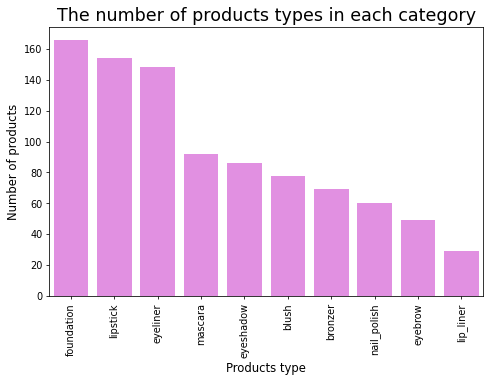

In [81]:
plt.figure(figsize=(8,5), dpi=70)
sns.barplot(x=prod.index,y=prod, color='violet')
plt.xticks(rotation=90)
plt.xlabel('Products type', fontsize=12)
plt.ylabel('Number of products', fontsize=12)
plt.title('The number of products types in each category', fontsize=18)
plt.show()

The largest amount of products are foundation, lipstick and eyeliner.

**Rating distribution:**

In [32]:
df['rating'].value_counts()

rating
5.0    86
4.0    53
4.5    29
4.3    23
4.8    21
4.7    17
4.4    15
4.6    13
3.0    13
4.2    12
3.8     9
2.5     6
4.1     6
3.9     5
3.3     5
4.9     5
3.7     5
3.4     4
2.0     4
3.5     3
2.6     1
3.6     1
2.3     1
1.5     1
3.2     1
3.1     1
Name: count, dtype: int64

In [33]:
rating = df['rating'].value_counts()

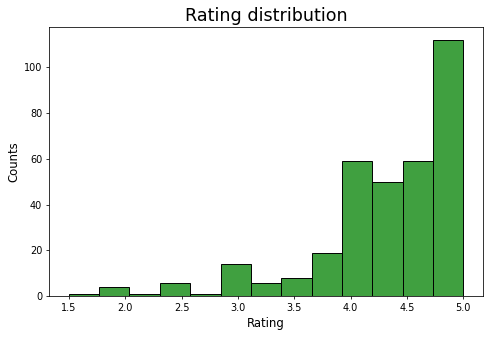

In [83]:
plt.figure(figsize=(8,5), dpi=70)
sns.histplot(df.rating, color='green')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Rating distribution', fontsize=18)
plt.show();

The most ratings are in the range of 4.5-5.0 but it happened rating 2 and below.

##### How many products have rating above 4?

In [44]:
print(df['product_type'].where(df['rating'] > 4).count())

227


**Brand distribution**

In [45]:
df['brand'].value_counts()

brand
nyx                         164
clinique                     93
dior                         74
maybelline                   54
covergirl                    54
smashbox                     46
l'oreal                      46
physicians formula           43
benefit                      41
revlon                       29
e.l.f.                       27
cargo cosmetics              20
pure anada                   16
marcelle                     15
almay                        14
pacifica                     13
iman                         13
milani                       13
dr. hauschka                 12
wet n wild                   12
annabelle                    11
marienatie                    9
mineral fusion                8
lotus cosmetics usa           7
sante                         6
anna sui                      6
rejuva minerals               6
suncoat                       6
glossier                      6
fenty                         5
orly                          4
es

Top 10 brands:

In [46]:
brand = df['brand'].value_counts().head(10)
brand

brand
nyx                   164
clinique               93
dior                   74
maybelline             54
covergirl              54
smashbox               46
l'oreal                46
physicians formula     43
benefit                41
revlon                 29
Name: count, dtype: int64

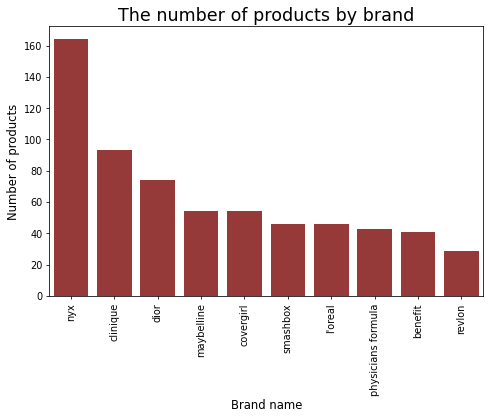

In [67]:
plt.figure(figsize=(8,5), dpi=70)
sns.barplot(x=brand.index,y=brand, color='brown')
plt.xticks(rotation=90)
plt.xlabel('Brand name', fontsize=12)
plt.ylabel('Number of products', fontsize=12)
plt.title('The number of products by brand', fontsize=18)
plt.show()

The most products offer brands "Nyx" , "Clinique" and "Dior".

**Price distribution**

What currencies are in data?

In [55]:
df['currency'].value_counts()

currency
USD    287
GBP     74
CAD      7
Name: count, dtype: int64

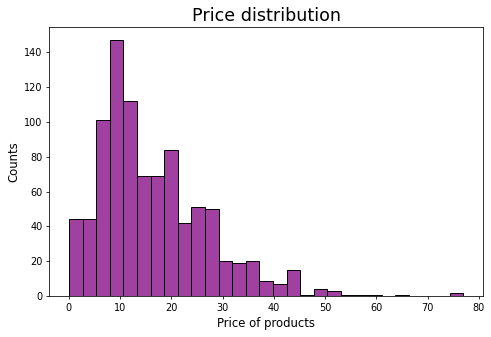

In [65]:
plt.figure(dpi=70, figsize=(8,5))
sns.histplot(df.price, color='purple')
plt.xlabel('Price of products', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Price distribution', fontsize=18)
plt.show();

Price distribution by currency:

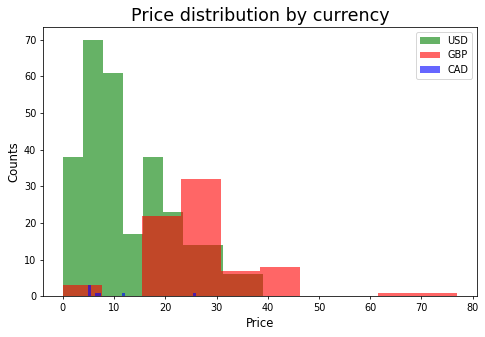

In [80]:
plt.figure(dpi=70, figsize=(8,5))
df[df.currency == 'USD'].price.plot(kind='hist', color='green', label='USD', alpha=0.6)
df[df.currency == 'GBP'].price.plot(kind='hist', color='red', label='GBP', alpha=0.6)
df[df.currency == 'CAD'].price.plot(bins=35, kind='hist', color='blue', label='CAD', alpha=0.6)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Price distribution by currency', fontsize=18)
plt.legend()
plt.show();

There are three types of currencies and the most are in dollars (USD).The most prices are in the range of 8-20.

### Overview of variables

The first two observations from the frame:

In [84]:
df.iloc[0:2,]

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"


Last three observations:

In [85]:
df.iloc[-3:,]

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
928,physicians formula,NaN,NaN,Physicians Formula Organic Wear Lash Boosting ...,3,Physicians Formula Organic Wear Lash Boosting ...,15.79,NaN,mascara,3.7,"['Gluten Free', 'Natural']"
929,NaN,NaN,NaN,Voluminous - Volume Building Waterproof Mascar...,2,L' Oreal Paris Voluminous Mascara,9.99,NaN,mascara,4.5,[]
930,pure anada,NaN,NaN,"Finally, a natural mascara you can feel good a...",1,Pure Anada Natural Mascara,14.00,NaN,mascara,4.6,"['Canadian', 'Gluten Free', 'Natural']"


#### Selecting specific data from columns

In [86]:
df.loc[3, ["brand", "category", "price", "rating", "product_type"]]

brand            colourpop
category            liquid
price                 12.0
rating                 NaN
product_type    foundation
Name: 3, dtype: object

In [87]:
df.loc[[4, 5], ["brand","category", "price", "rating", "product_type"]]

,brand,category,price,rating,product_type
4,boosh,lipstick,26.0,NaN,lipstick
5,deciem,liquid,6.7,NaN,foundation


In [4]:
df2 = df.loc[:, ["brand","category", "price", "rating", "product_type"]]
df2.head()

,brand,category,price,rating,product_type
0,colourpop,pencil,5.0,NaN,lip_liner
1,colourpop,lipstick,5.5,NaN,lipstick
2,colourpop,lipstick,5.5,NaN,lipstick
3,colourpop,liquid,12.0,NaN,foundation
4,boosh,lipstick,26.0,NaN,lipstick


Example of 'covergirl' brand:

In [93]:
df2.loc[df2['brand'] == 'covergirl'].head()

,brand,category,price,rating,product_type
481,covergirl,NaN,13.99,NaN,bronzer
493,covergirl,NaN,8.99,5.0,bronzer
505,covergirl,powder,13.99,NaN,blush
512,covergirl,powder,13.99,5.0,blush
519,covergirl,powder,8.99,5.0,blush


Price greater than 50:

In [94]:
df2[df2['price'] > 50]

,brand,category,price,rating,product_type
329,dior,palette,65.00,NaN,eyeshadow
364,dior,lipstick,77.00,NaN,lipstick
386,benefit,NaN,75.00,NaN,bronzer
454,smashbox,NaN,55.00,NaN,eyebrow
456,smashbox,palette,52.00,NaN,eyeshadow
549,stila,cream,51.00,NaN,blush
550,stila,cream,51.00,NaN,blush
676,mistura,NaN,56.49,2.6,eyeshadow
689,pacifica,NaN,60.00,4.9,bronzer


Rating greater than 4.0 and price greater than 20: 

In [95]:
df2[(df2['rating'] > 4.0) & (df2['price'] > 20)].head()

,brand,category,price,rating,product_type
486,physicians formula,NaN,20.99,4.7,bronzer
489,NaN,NaN,24.00,5.0,bronzer
490,cargo cosmetics,NaN,29.00,5.0,bronzer
496,dr. hauschka,NaN,45.00,4.6,bronzer
507,cargo cosmetics,NaN,36.00,5.0,bronzer


Rating greater than 4.5 and price less than 10:

In [96]:
df2[(df2['rating'] > 4.5) & (df2['price'] < 10)].head()

,brand,category,price,rating,product_type
493,covergirl,NaN,8.99,5.0,bronzer
519,covergirl,powder,8.99,5.0,blush
522,covergirl,powder,6.99,5.0,blush
528,covergirl,powder,6.99,5.0,blush
536,e.l.f.,powder,9.99,4.7,blush


Observations where the rating between 1 and 3:

In [97]:
df2[df2['rating'].between(1,3)].head()

,brand,category,price,rating,product_type
495,physicians formula,NaN,21.99,2.5,bronzer
511,sante,powder,23.49,3.0,blush
552,nyx,cream,9.99,2.0,blush
556,NaN,cream,15.00,2.3,blush
569,marcelle,NaN,10.99,3.0,lip_liner


**Sorting by value:**

In [106]:
df2.sort_values(by='brand').head()

,brand,category,price,rating,product_type
635,almay,liquid,17.29,4.5,foundation
886,almay,NaN,10.99,4.3,mascara
661,almay,NaN,10.99,4.5,eyeshadow
529,almay,powder,14.49,4.0,blush
649,almay,NaN,10.49,4.0,eyeshadow


In [107]:
df2.sort_values(by='rating', ascending=False).head()

,brand,category,price,rating,product_type
472,nyx,NaN,10.49,5.0,bronzer
750,marcelle,liquid,11.99,5.0,eyeliner
758,physicians formula,liquid,14.79,5.0,eyeliner
761,physicians formula,liquid,14.79,5.0,eyeliner
767,e.l.f.,liquid,3.99,5.0,eyeliner


#### Data Aggregation
Number of observations in the column:

In [98]:
df2.groupby('category').size()

category
bb_cc            9
concealer       19
contour          3
cream           34
gel              3
highlighter      2
lip_gloss       26
lip_stain        4
lipstick       122
liquid         117
mineral         11
palette         27
pencil          62
powder          68
dtype: int64

**How many types of products offerr each brand?**

In [105]:
df2.groupby('brand').count()[['product_type']].sort_values('product_type', ascending=False)

,product_type
brand,
nyx,164
clinique,93
dior,74
covergirl,54
maybelline,54
smashbox,46
l'oreal,46
physicians formula,43
benefit,41


The most products offer brand "Nyx" and "Clinique".

**Product type by rating:**

In [32]:
df2.groupby('product_type')[['rating']].mean().sort_values('rating', ascending=False)

,rating
product_type,
bronzer,4.608333
lipstick,4.435000
blush,4.419444
eyeshadow,4.392500
lip_liner,4.363636
mascara,4.281633
eyeliner,4.230189
foundation,4.218519
nail_polish,4.118182


The best rated products are bronzer, lipstick and blush.

**Price value analysis**

Max and mean price for each type of product:

In [99]:
df2.groupby('product_type')['price'].agg(['max', 'mean'])

,max,mean
product_type,,
blush,51.00,17.155395
bronzer,75.00,22.738841
eyebrow,55.00,20.963542
eyeliner,36.00,12.624014
eyeshadow,65.00,17.978929
foundation,49.00,20.672407
lip_liner,20.49,9.859655
lipstick,77.00,14.517647
mascara,33.00,14.193596


Max, mean price and rating for each type of product:

In [95]:
df2.groupby('product_type')['price', 'rating'].agg(['max', 'mean'])

price            rating          
                max       mean    max      mean
product_type                                   
blush         51.00  17.155395    5.0  4.419444
bronzer       75.00  22.738841    5.0  4.608333
eyebrow       55.00  20.963542    NaN       NaN
eyeliner      36.00  12.624014    5.0  4.230189
eyeshadow     65.00  17.978929    5.0  4.392500
foundation    49.00  20.672407    5.0  4.218519
lip_liner     20.49   9.859655    5.0  4.363636
lipstick      77.00  14.517647    5.0  4.435000
mascara       33.00  14.193596    5.0  4.281633
nail_polish   22.49  12.901500    5.0  4.118182

In [103]:
df2.groupby('product_type').agg({'price': [np.size, np.mean, np.max ]})

price                  
              size       mean    max
product_type                        
blush           78  17.155395  51.00
bronzer         69  22.738841  75.00
eyebrow         49  20.963542  55.00
eyeliner       148  12.624014  36.00
eyeshadow       86  17.978929  65.00
foundation     166  20.672407  49.00
lip_liner       29   9.859655  20.49
lipstick       154  14.517647  77.00
mascara         92  14.193596  33.00
nail_polish     60  12.901500  22.49

Average price of each product type:

In [109]:
avg_price = df2.groupby(['product_type'])[['price']].mean().sort_values('price', ascending=False)
avg_price

,price
product_type,
bronzer,22.738841
eyebrow,20.963542
foundation,20.672407
eyeshadow,17.978929
blush,17.155395
lipstick,14.517647
mascara,14.193596
nail_polish,12.901500
eyeliner,12.624014


<Figure size 384x288 with 0 Axes>

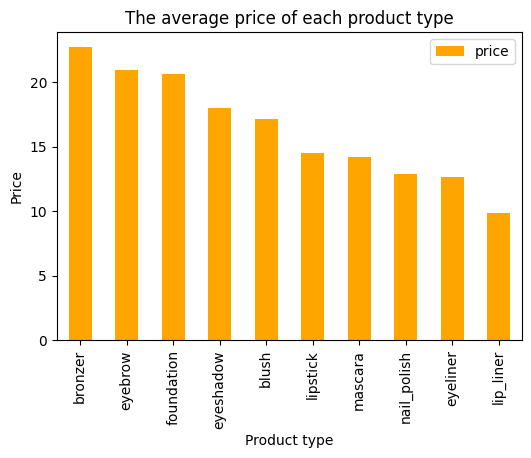

In [120]:
plt.figure(dpi=60)
avg_price.plot(kind='bar', color='orange', figsize=(6,4))
plt.xlabel('Product type', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('The average price of each product type')
plt.show();

In the figure one can see that average price of products are similar and largest average price have bronzer, eyebrow and foundation.

## Summary statistics

Descriptive Statistics for numeric columns:

In [22]:
df3 = df2[['rating', 'price']]
df3.head()

,rating,price
0,NaN,5.0
1,NaN,5.5
2,NaN,5.5
3,NaN,12.0
4,NaN,26.0


In [23]:
df3.describe()

,rating,price
count,340.000000,917.000000
mean,4.319118,16.508593
std,0.675849,11.028035
min,1.500000,0.000000
25%,4.000000,8.990000
50%,4.500000,13.990000
75%,5.000000,22.000000
max,5.000000,77.000000


In [24]:
print(df3['price'].mean().round(2))

16.51


In [25]:
print(df3['rating'].mean().round(2))

4.32


Mean price for each rating:

In [26]:
df3.groupby(['rating'])[['price']].mean().sort_values('price', ascending=False)

,price
rating,
2.6,56.490000
4.9,31.096000
3.6,28.000000
4.1,16.376667
4.8,16.197619
4.6,16.169231
3.4,15.872500
3.1,15.790000
3.2,15.790000


##### The mean price of selected products:

In [29]:
df3.loc[df2['brand'] == 'maybelline'].mean()

rating     4.082609
price     11.138148
dtype: float64

In [30]:
df3.loc[df2['category'] == 'lipstick'].mean()

rating     4.464865
price     14.444050
dtype: float64

**Corelation:**

In [27]:
corr = df3.corr()
corr

,rating,price
rating,1.000000,0.018888
price,0.018888,1.000000


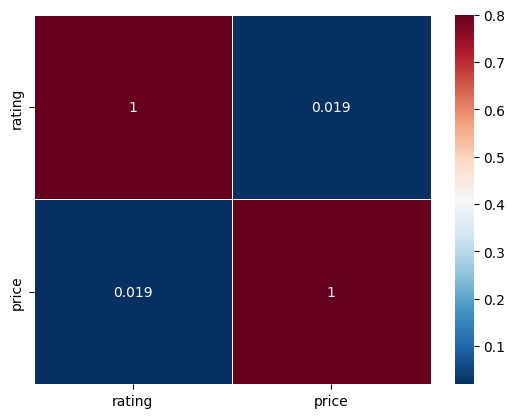

In [28]:
ax=sns.heatmap(corr, annot=True, linewidth=0.5, cmap='RdBu_r', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

In the above figure one can see that the variables are strongly correlated with themselves.

## Summary

This project was aimed to exploratory data analysis of cosmetic products. I have analyzed and plots of individual variables. I also made an overview of variables and selecting specific data from columns. Data Aggregation let me to answer to a few questions. Finally I I calculated the basic statistics.